In [2]:
def get_odd_numbers(numbers):
    odd_numbers = []

    for number in numbers:
        if number % 2 == 1:
            odd_numbers.append(number)

    return odd_numbers

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

# Sección A

En esta sección se responden las preguntas del ejercicio que hace referencia a la **Agencia digital de Innovación Pública**

**1. ¿Qué pruebas identificarías para asegurar la calidad de los datos? No es necesario hacerlas, sólo describe la prueba y lo que te dice cada una**

In [4]:
data =  pd.read_csv('data/48fcb848-220c-4af0-839b-4fd8ac812c0f')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,_id,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,1,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01T00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01T00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,3,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01T01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,4,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01T02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,5,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01T02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [6]:
data.dtypes

_id                       int64
ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

- Valores faltantes por variables: cuando se trabaja con bases de datos es muy común tener valores faltantes en las observaciones, pues no se realizó el registro correspondiente, hubo una falla en el sistema que recopila dicha información, ... es por ello que es de suma utilidad cuantificar cuántos valores faltantes tenemos en total y además por columna. La manera de realizarlo es contar los valores faltantes por columna y esto se puede lograr con la función `isna` de `pandas` junto con `sum`. Es muy recomendable reportar estos valores en porcentaje (%), por lo que, se divide dichas cifras entre el total de datos que se tiene.

In [7]:
n_datos = data.shape[0]

In [8]:
pd.isna(data).sum(axis=0)/n_datos

_id                     0.000000
ao_hechos               0.000371
mes_hechos              0.000371
fecha_hechos            0.000371
ao_inicio               0.000000
mes_inicio              0.000000
fecha_inicio            0.000000
delito                  0.000000
fiscalia                0.000002
agencia                 0.000000
unidad_investigacion    0.000194
categoria_delito        0.000000
calle_hechos            0.002541
calle_hechos2           0.607075
colonia_hechos          0.040602
alcaldia_hechos         0.002719
competencia             0.910832
longitud                0.039773
latitud                 0.039773
tempo                   1.000000
dtype: float64

Nótese que la columna `tempo` contiene puros valores faltantes, por lo que es recomendable seguir con el análisis sin tomar en cuenta esta variable, además la variable `competencia` contiene $91\%$ de datos faltantes.

In [9]:
data_limpia = data.loc[:,data.columns != 'tempo']
data_limpia = data_limpia.loc[:,data_limpia.columns != 'competencia']
data_limpia = data_limpia.loc[:,data_limpia.columns != 'calle_hechos2']
data_limpia = data_limpia.loc[:,data_limpia.columns != 'calle_hechos']
data_limpia = data_limpia.dropna()

- Prueba ID únicos: esta prueba sirve para identificar si verdaderamente la columna que hace referencia a *id_* en realidad es un identificador único de la observación correspondiente, es de mucha utilidad tener de un identificador único por observación, ya que, en ocasiones se junta la información obtenida de una tabla con otra y esto se logra gracias a dicho identificado única. La manera de realizarla es obtener un conteo de las observaciones únicas que hay en esta columna y después verificar que la cantidad sea igual a la cantidad de datos que hay.


In [10]:
len(np.unique(data._id)) == n_datos

True

- Introducción a los datos: esta prueba sugiero utilizarla y consiste en tener un primer acercamiento con los datos. Esto es, tener una ligera idea de cómo están distribuídos, medidas de tendencia central, dispersión, conteos,... Para ello, utilizo la función `describe` de `pandas` para los datos numéricos y obtener un conteo de cada uno de las categorías para los datos categóricos. 

- Fechas correctas: dado que estamos trabajando con una base de datos que contiene variables que hacen referencia a la ocurrencia de un evento en el tiempo (fechas) es recomendable asegurarse que dicha fecha se encuentre dentro del periodo en el cual se haya definido la recopilación de los datos. Para ello basta con verificar que las fechas se enceuntren en el intervalo de tiempo definido. Para esta base de datos no encontré un intervalo pero es relevante mencionar que hay datos de años 1906-1942 que suenan "sospechosos" (quizá es un error de captura), mientras que las fechas más recientes hacen referencia a febrero del año 2021.

In [11]:
data_limpia.fecha_hechos.sort_values().head(20)

727809     1906-06-02 19:00:00
14706      1915-01-10 15:00:00
97656      1915-09-10 10:00:00
716046     1930-02-16 12:00:00
710194     1942-10-22 19:00:00
1136635    1950-01-01 12:00:00
965945     1950-02-17 19:50:00
1102453    1952-12-23 12:00:00
457091     1954-05-04 19:54:00
1155099    1955-01-02 12:00:00
1160       1955-02-08 04:55:00
209172     1955-12-20 08:00:00
77013      1956-01-02 11:00:00
9348       1956-05-01 19:00:00
832512     1957-01-25 12:00:00
686158     1958-10-31 08:50:00
395242     1960-05-20 17:00:00
1100355    1962-02-15 08:00:00
732817     1962-12-11 11:00:00
607521     1963-10-06 14:39:00
Name: fecha_hechos, dtype: object

**2. Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias)**

Notemos que el délito con mayor frecuencia es *DELITO DE BAJO IMPACTO* y el de menor *PLAGIO O SECUESTRO* y *FEMINICIDIO*, sin embargo, pensemos en la naturaleza de los últimos delitos es muy grave y quizá no se reporten todos los ocurridos realmente, sino que por temas de seguridad de los individuos deseen no reportarlos. Para el caso de *DELITO DE BAJO IMPACTO* es una categoría muy amplía (convendría tener una descripción amplia de qué délitos incluye). A continuación, se analizará la frecuencia de los delitos a lo largo del tiempo.

In [12]:
data_limpia['fecha_hechos_date'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.date

In [13]:
data_group = data_limpia.groupby(by = ['fecha_hechos_date', 'categoria_delito'])['categoria_delito'].\
    count().to_frame(name = 'count')

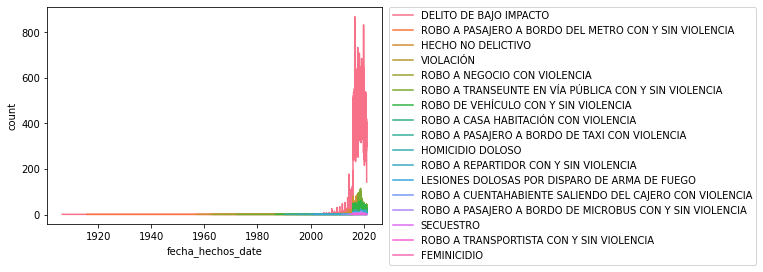

In [14]:
plot_del = sns.lineplot(data = data_group, 
                    x = 'fecha_hechos_date', y = 'count',
                    hue = 'categoria_delito')
plot_del.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Dada la dispersión de las fechas es difícil analizar este gráfico, sin embargo, notemos que *DELITO DE BAJO IMPACTO* parece tener una mayor frecuencia en los últimos años.

**3. ¿Cuál es la alcaldía que tiene más delitos y cuál es la que tiene menos? ¿Por qué crees que sea esto?**

Top $10$:

In [15]:
data_limpia['alcaldia_hechos'].value_counts().sort_index().reset_index().\
    sort_values(by='alcaldia_hechos', ascending = False).head(10)

,index,alcaldia_hechos
5,CUAUHTEMOC,173931
8,IZTAPALAPA,167733
6,GUSTAVO A MADERO,113067
2,BENITO JUAREZ,96109
0,ALVARO OBREGON,76802
3,COYOACAN,76213
10,MIGUEL HIDALGO,74815
13,TLALPAN,66671
14,VENUSTIANO CARRANZA,65055
1,AZCAPOTZALCO,55986


Según datos reportados de [wikipedia](https://es.wikipedia.org/wiki/Demarcaciones_territoriales_de_la_Ciudad_de_M%C3%A9xico) el *Top-10* de las alcaldías con mayor población son:
1. Gustavo A. Madero
1. Iztapalapa
1. Milpa Alta
1. Cuajimalpa de Morelos
1. Magdalena Contreras
1. Tláhuac
1. Iztacalco
1. Miguel Hidalgo
1. Azcapotzalco
1. Benito Juárez

Notemos que 5 de ellas (Iztapalapa, Gustavo A. Madero, Benito Juárez, Miguel Hidalgo y Azcapotzalco) se encuentran dentro de las alcaldías con mayor población, lo cual puede sugerir a que las alcaldías con mayor cantidad de delitos tienen alta frecuencia dada su densidad poblacional, sin embargo, no descartemos la idea de que puede ocurrir algo dentro de las alcaldías que haga que tengan una alta tasa de delitos (falta de seguridad, alta tasa de sectas delictivas en la zona, ...).

Bottom $10$:

In [16]:
aux = data_limpia['alcaldia_hechos'].value_counts().sort_index().reset_index().\
    sort_values(by='alcaldia_hechos', ascending = False)
aux.loc[aux.alcaldia_hechos > 20,:].tail(10)

,index,alcaldia_hechos
10,MIGUEL HIDALGO,74815
13,TLALPAN,66671
14,VENUSTIANO CARRANZA,65055
1,AZCAPOTZALCO,55986
7,IZTACALCO,48030
15,XOCHIMILCO,35587
12,TLAHUAC,26825
9,LA MAGDALENA CONTRERAS,18556
4,CUAJIMALPA DE MORELOS,16861
11,MILPA ALTA,7791


Para elegir el *Bottom 10* decidí mostrar aquellas alcaldías cuya cantidad de delitos fuese mayor a 20, pues hay $229$ alcaldías con un $1$ delito reportado. 

**4. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? ¿A qué crees que se deba?**

In [17]:
data_limpia['year'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.year
data_limpia['month'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.month
data_limpia['week'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.week
data_limpia['week_day'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.weekday

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


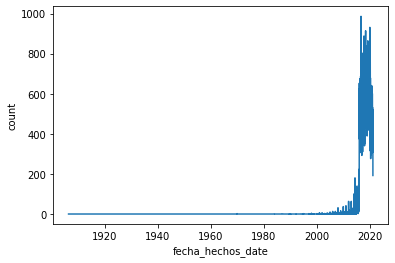

In [18]:
data_group = data_limpia.groupby(by = ['fecha_hechos_date'])['fecha_hechos_date'].\
    count().to_frame(name = 'count')
plot_del = sns.lineplot(data = data_group, 
                    x = 'fecha_hechos_date', y = 'count')

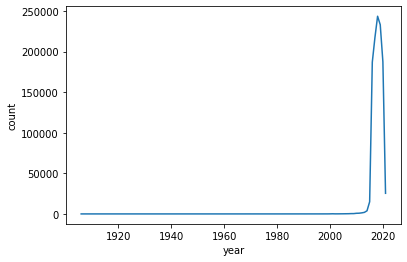

In [19]:
data_group = data_limpia.groupby(by = ['year'])['categoria_delito'].\
    count().to_frame(name = 'count')
plot_del = sns.lineplot(data = data_group, 
                    x = 'year', y = 'count')

Es difícil analizar este gráfico dada la dispersión de los años, analizaremos la información recopilada desde el año $2000$.

In [20]:
data_limpia['year'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.year
data_limpia['month'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.month
data_limpia['week'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.week
data_limpia['week_day'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.weekday
data_limpia['hour'] = pd.to_datetime(data_limpia['fecha_hechos'], dayfirst=True).dt.hour

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
data_filter = data_limpia.loc[data_limpia.year > 2000,:]

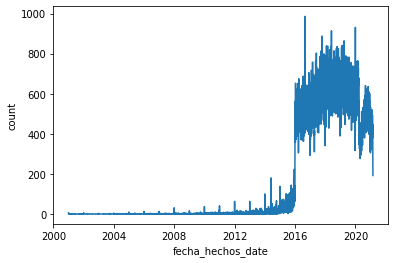

In [22]:
data_group = data_filter.groupby(by = ['fecha_hechos_date'])['fecha_hechos_date'].\
    count().to_frame(name = 'count')
plot_del = sns.lineplot(data = data_group, 
                    x = 'fecha_hechos_date', y = 'count')

[Text(0.5, 1.0, 'Agrupación por mes'),
 Text(0.5, 0, 'Mes'),
 Text(0, 0.5, 'Frecuencia')]

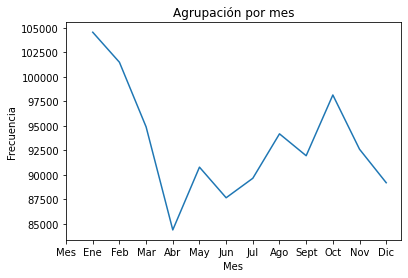

In [23]:
data_group = data_filter.groupby(by = ['month'])['month'].\
    count().to_frame(name = 'count')
plot_del = sns.lineplot(data = data_group, 
                    x = 'month', y = 'count')
plot_del.set_xticks(range(13))
plot_del.set_xticklabels(['Mes','Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'])
plot_del.set(title='Agrupación por mes', xlabel = 'Mes', ylabel = 'Frecuencia')

Este gráfico sugiere que la mayoría de los délitos son cometidos en enero y existe una alza en la cantidad cometidos a mediados del año, en específico, los meses de Julio-Octubre y después de este periodo comienza a disminuir.

In [24]:
quincena = get_odd_numbers(range(1, 53))

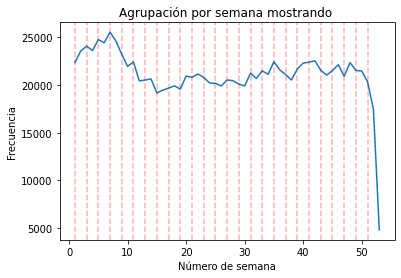

In [25]:
data_group = data_filter.groupby(by = ['week'])['week'].\
    count().to_frame(name = 'count')
plot_del = sns.lineplot(data = data_group, 
                    x = 'week', y = 'count')
plot_del.set(title='Agrupación por semana mostrando ', xlabel = 'Número de semana', ylabel = 'Frecuencia')
#plot_del.axvline(quincena)
for xc in quincena:
    plot_del.axvline(x=xc, color='red', linestyle='--', alpha = 0.3)

Las franjas rosas representan si la semana correspondiente cae en quincena o no. Notemos que hay un ligero incremento en cuando hay quincena que cuando no hay. De igual manera, notemos que la cantidad de delitos cometidos disminuye drásticamente en las últimas semanas del año.

[Text(0.5, 1.0, 'Agrupación por día de la semana'),
 Text(0.5, 0, 'Día de la semana'),
 Text(0, 0.5, 'Frecuencia')]

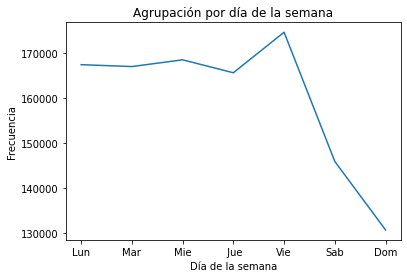

In [26]:
data_group = data_filter.groupby(by = ['week_day'])['week_day'].\
    count().to_frame(name = 'count')
plot_del = sns.lineplot(data = data_group, 
                    x = 'week_day', y = 'count')
plot_del.set_xticks(range(7))
plot_del.set_xticklabels(['Lun', 'Mar', 'Mie',' Jue', 'Vie', 'Sab','Dom' ])
plot_del.set(title='Agrupación por día de la semana', xlabel = 'Día de la semana', ylabel = 'Frecuencia')

Notemos que hay un ligero incremento en los delitos cometidos cuando es día viernes, así como una gran disminución cuando es domingo.

[Text(0.5, 1.0, 'Agrupación por hora del día'),
 Text(0.5, 0, 'Hora del día'),
 Text(0, 0.5, 'Frecuencia')]

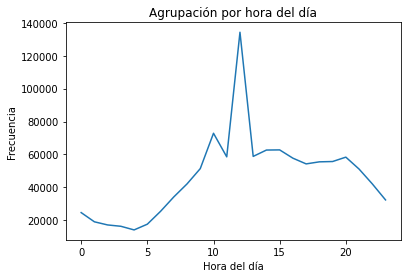

In [27]:
data_group = data_filter.groupby(by = ['hour'])['hour'].\
    count().to_frame(name = 'count')
plot_del = sns.lineplot(data = data_group, x = 'hour', y = 'count')
plot_del.set(title='Agrupación por hora del día', xlabel = 'Hora del día', ylabel = 'Frecuencia')

Es muy interesante que la hora en donde se reportan más casos es alrededor de las 12 del día, lo cual puede sonar un poco extraño, pues se esperaría que los delitos tuvieran una mayor tasa a medida que la luz del sol disminuye, por lo que esperaría tener mayor frecuencia en la madrugada y noche. Sin embargo, recordemos que estos son casos reportados, no ocurridos, puede ser que los casos ocurridos en la noche no los reporte las personas dada la hora que son, temer por su seguridad, no le dieron importancia, ...

**5. ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.**

Se analizó que se tiene muchas alcaldías con muy poca frecuencia, así como delitos. Es por ello que apartir de dichas variables crearé variables auxiliares que en una misma categoriá se incluyan las categorías que contienen una frecuencia relativamente baja para ambas variables.

In [28]:
# Umbral
threshold_percent = (100/1168250)*100

series_alcaldia = pd.value_counts(data_limpia['alcaldia_hechos'])
mask_alcaldia = (series_alcaldia / series_alcaldia.sum() * 100).lt(threshold_percent)

series_delito = pd.value_counts(data_limpia['delito'])
mask_delito = (series_delito / series_delito.sum() * 100).lt(threshold_percent)

# Auxiliar de alcaldia
data_limpia = data_limpia.assign(alcaldia_hechos_actualizada = np.where(data_limpia['alcaldia_hechos'].\
                                                                        isin(series_alcaldia[mask_alcaldia].index),
                                                                        'Otra', data_limpia['alcaldia_hechos']))

# Auxiliar de delito
data_limpia = data_limpia.assign(delito_actualizada = np.where(data_limpia['delito'].\
                                                               isin(series_delito[mask_delito].index),
                                                               'Otro', data_limpia['delito']))

In [29]:
tabla_cruzada = pd.crosstab(data_limpia.delito_actualizada, data_limpia.alcaldia_hechos_actualizada,
                            rownames=['delito'], colnames=['alcaldia_hechos'])

In [30]:
alcaldia_list = []
delito_list = []
n_list = []
for alcaldia in tabla_cruzada.columns:
    alcaldia_list.append(alcaldia)
    delito_list.append(tabla_cruzada.index.values[tabla_cruzada[alcaldia] == max(tabla_cruzada[alcaldia])][0])
    n_list.append(max(tabla_cruzada[alcaldia]))
df_alcaldias_delitos_max = pd.DataFrame(list(zip(alcaldia_list, delito_list, n_list)),
                                       columns = ['alcaldia', 'delito', 'n'])
df_alcaldias_delitos_max.sort_values(by='n', ascending=False).head(25)

,alcaldia,delito,n
8,IZTAPALAPA,VIOLENCIA FAMILIAR,20867
5,CUAUHTEMOC,FRAUDE,16983
6,GUSTAVO A MADERO,VIOLENCIA FAMILIAR,13417
2,BENITO JUAREZ,FRAUDE,9512
0,ALVARO OBREGON,VIOLENCIA FAMILIAR,8639
13,TLALPAN,VIOLENCIA FAMILIAR,8466
3,COYOACAN,VIOLENCIA FAMILIAR,7528
7,IZTACALCO,VIOLENCIA FAMILIAR,6866
10,MIGUEL HIDALGO,FRAUDE,6809
14,VENUSTIANO CARRANZA,VIOLENCIA FAMILIAR,6517


In [31]:
for alcaldia in tabla_cruzada.columns:
    print('\t---ALCALDÍA: ', alcaldia)
    print('TOP 5 DELITOS:')
    print(tabla_cruzada[alcaldia].sort_values(ascending=False)[0:5])

	---ALCALDÍA:  ALVARO OBREGON
TOP 5 DELITOS:
delito
VIOLENCIA FAMILIAR              8639
AMENAZAS                        4379
ROBO A NEGOCIO SIN VIOLENCIA    4266
ROBO DE OBJETOS                 4166
FRAUDE                          4162
Name: ALVARO OBREGON, dtype: int64
	---ALCALDÍA:  AZCAPOTZALCO
TOP 5 DELITOS:
delito
VIOLENCIA FAMILIAR                                5458
ROBO A NEGOCIO SIN VIOLENCIA                      3970
AMENAZAS                                          3620
ROBO DE OBJETOS                                   3366
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA    3113
Name: AZCAPOTZALCO, dtype: int64
	---ALCALDÍA:  BENITO JUAREZ
TOP 5 DELITOS:
delito
FRAUDE                          9512
ROBO DE ACCESORIOS DE AUTO      7909
ROBO A NEGOCIO SIN VIOLENCIA    7684
ROBO DE OBJETOS                 5941
VIOLENCIA FAMILIAR              4306
Name: BENITO JUAREZ, dtype: int64
	---ALCALDÍA:  COYOACAN
TOP 5 DELITOS:
delito
VIOLENCIA FAMILIAR              7528
ROBO DE OBJETOS  

In [32]:
alcaldia_list = []
delito_list = []
n_list = []
for alcaldia in tabla_cruzada.columns:
    alcaldia_list.append(alcaldia)
    delito_list.append(tabla_cruzada.index.values[tabla_cruzada[alcaldia] == min(tabla_cruzada[alcaldia])][0])
    n_list.append(min(tabla_cruzada[alcaldia]))
df_alcaldias_delitos_min = pd.DataFrame(list(zip(alcaldia_list, delito_list, n_list)),
                                       columns = ['alcaldia', 'delito', 'n'])
df_alcaldias_delitos_min.sort_values(by='n', ascending=False)

,alcaldia,delito,n
5,CUAUHTEMOC,DDH CERESO,1
0,ALVARO OBREGON,DDH CERESO,0
1,AZCAPOTZALCO,PERDIDA DE LA VIDA POR AHOGAMIENTO,0
2,BENITO JUAREZ,ROBO A PASAJERO EN RTP CON VIOLENCIA,0
3,COYOACAN,DDH CERESO,0
4,CUAJIMALPA DE MORELOS,DDH CERESO,0
6,GUSTAVO A MADERO,"ROBO EN EVENTOS MASIVOS (DEPORTIVOS, CULTURALE...",0
7,IZTACALCO,DDH CERESO,0
8,IZTAPALAPA,ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA,0
9,LA MAGDALENA CONTRERAS,DDH CERESO,0


In [33]:
for alcaldia in tabla_cruzada.columns:
    print('\t---ALCALDÍA: ', alcaldia)
    print('BOTTOM 5 DELITOS:')
    print(tabla_cruzada[alcaldia].sort_values(ascending=True)[0:5])

	---ALCALDÍA:  ALVARO OBREGON
BOTTOM 5 DELITOS:
delito
DDH CERESO                                                                       0
PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO                                      1
ROBO EN EVENTOS MASIVOS (DEPORTIVOS, CULTURALES, RELIGIOSOS Y ARTISTICOS) S/V    1
ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA                             1
ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA                                        1
Name: ALVARO OBREGON, dtype: int64
	---ALCALDÍA:  AZCAPOTZALCO
BOTTOM 5 DELITOS:
delito
ROBO EN EVENTOS MASIVOS (DEPORTIVOS, CULTURALES, RELIGIOSOS Y ARTISTICOS) S/V    0
PERDIDA DE LA VIDA POR AHOGAMIENTO                                               0
DDH CERESO                                                                       1
USURPACION DE FUNCIONES PUBLICAS                                                 1
PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA                                     1
Name: AZCAPOTZALCO, dtype: 

**6. Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?**

El indicador que crearé se basa en las siguientes variables:
- Categoría delito
- Longitud, ya que, tengo la teoría de que puede haber una relación entre la zona donde ocurrió el delito es importante
- Latitud, ya que, tengo la teoría de que puede haber una relación entre la zona donde ocurrió el delito es importante
- Número de semana, ya que, se observó que en quincena hay un ligero incremento.
- Mes del año, ya que, se observó que los domingos hay decremento, mientras que los viernes, incremento.

In [34]:
data_limpia['week_sin'] = np.sin(data_limpia['week'])
data_limpia['week_cos'] = np.cos(data_limpia['week'])

data_limpia['month_sin'] = np.sin(data_limpia['month'])
data_limpia['month_cos'] = np.cos(data_limpia['month'])

In [35]:
data_indicador = data_limpia[['longitud', 'latitud', 
                              'week_sin', 'week_cos', 'month_sin', 'month_cos']]

In [36]:
### Transformación de datos
# Tipos de features
numeric_features = data_indicador.select_dtypes(include=['float64', 'int']).columns.to_list()

# Transformadores
transformers = [('standar_scaler', MinMaxScaler(), numeric_features)]
preprocessor = ColumnTransformer(transformers,
                                     remainder='passthrough')

# Transformacion
data_transf = preprocessor.fit_transform(data_indicador)
#data_dense = data_transf.todense()

# Tomando los nombres de las categorias del onehot
#encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(categoric_features)
#labels = np.concatenate([encoded_cat, numeric_features])
labels = np.concatenate([numeric_features])
labels = labels.tolist()

# Data final
#data_pca = pd.DataFrame(data_dense, columns=labels)
data_pca = pd.DataFrame(data_transf, columns=labels)

In [37]:
data_pca.head(5)

,longitud,latitud,week_sin,week_cos,month_sin,month_cos
0,0.849536,0.583961,0.121600,0.173176,0.925660,0.784701
1,0.874291,0.527697,0.121600,0.173176,0.925660,0.784701
2,0.910929,0.535058,0.020534,0.641874,0.959755,0.294255
3,0.977028,0.484199,0.121600,0.173176,0.925660,0.784701
4,0.824655,0.597894,0.993358,0.418526,0.232949,0.940356


La metodología que utilizaré para la creación del nivel de inseguridad es **PCA**, pues ha tenido un buen desempeño para la creación de rankings.

Como primer paso eliminamos los registros con valores faltantes

In [38]:
pd.isna(data_pca).sum(axis=0)/n_datos

longitud     0.0
latitud      0.0
week_sin     0.0
week_cos     0.0
month_sin    0.0
month_cos    0.0
dtype: float64

In [39]:
data_pca = data_pca.dropna()

In [40]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_pca)
modelo_pca = pca_pipe.named_steps['pca']

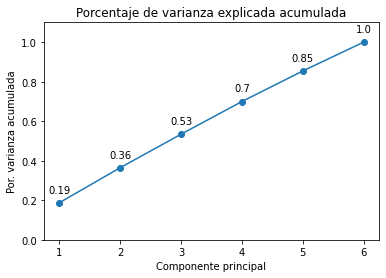

In [41]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data_pca.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data_pca.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Como primer, punto observamos que el porcentaje de varianza explicada por cada componente es muy bajo para cada una de las componentes principales. Para fines, prácticos supongamos que basta con la primer componente y el porcentaje de varianza explicado por dicha componente es suficiente.

In [42]:
proyecciones = pca_pipe.transform(X=data_pca)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
    index   = data_pca.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.034366,0.215613,-0.047491,-1.039184,1.734674,0.101483
1,-0.689691,0.230040,-0.038288,-1.043790,1.731699,0.003397
2,-1.211436,1.199591,-1.201300,-0.027406,1.009767,-0.580898
3,-2.468465,0.267811,-0.023109,-1.060693,1.716557,-1.344928
4,0.386327,-1.754079,1.000502,0.033933,-0.301463,0.413151


In [43]:
data_limpia['ranking'] = proyecciones.PC1

In [44]:
data_limpia.groupby('categoria_delito')['ranking'].mean().sort_values(ascending=False)

categoria_delito
FEMINICIDIO                                                0.326646
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA              0.013118
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA    0.011196
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA    0.005080
VIOLACIÓN                                                  0.003812
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                       0.000923
HOMICIDIO DOLOSO                                           0.000750
DELITO DE BAJO IMPACTO                                     0.000556
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA       0.000230
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA     -0.000216
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO             -0.000626
HECHO NO DELICTIVO                                        -0.002903
ROBO A NEGOCIO CON VIOLENCIA                              -0.017219
ROBO A CASA HABITACIÓN CON VIOLENCIA                      -0.019743
ROBO A REPARTIDOR CON Y SIN VIO

Notemos en primera instancia que la mayoría de los delitos con valor positivo del ranking (en promedio), tienen asociado la muerte de una persona o bien los caracterizo como delitos de mayor gravedad, pues directamente hay una muerte o violación. Mientras que, para los de valor negativo no se llega a tal grado.

In [45]:
data_limpia.groupby('alcaldia_hechos')['ranking'].mean().sort_values(ascending=False)

alcaldia_hechos
TLALPAN                   0.005947
CUAUHTEMOC                0.004031
IZTAPALAPA                0.003570
IZTACALCO                 0.000986
TLAHUAC                   0.000585
AZCAPOTZALCO              0.000456
BENITO JUAREZ            -0.000969
VENUSTIANO CARRANZA      -0.002288
MIGUEL HIDALGO           -0.002348
ALVARO OBREGON           -0.002542
GUSTAVO A MADERO         -0.002904
CUAJIMALPA DE MORELOS    -0.005105
COYOACAN                 -0.005727
LA MAGDALENA CONTRERAS   -0.007726
MILPA ALTA               -0.007753
XOCHIMILCO               -0.009322
Name: ranking, dtype: float64

In [46]:
data_limpia['alcaldia_hechos'].value_counts().sort_index().reset_index().\
    sort_values(by='alcaldia_hechos', ascending = False)

,index,alcaldia_hechos
5,CUAUHTEMOC,173931
8,IZTAPALAPA,167733
6,GUSTAVO A MADERO,113067
2,BENITO JUAREZ,96109
0,ALVARO OBREGON,76802
3,COYOACAN,76213
10,MIGUEL HIDALGO,74815
13,TLALPAN,66671
14,VENUSTIANO CARRANZA,65055
1,AZCAPOTZALCO,55986


Notemos que la alcaldía con mayor valor del ranking (en promedio) corresponde a Tlalpan, que no es una alcaldía con una alta tasa de delitos, como lo es la delegación de Cuauhtémoc que al igual es una alcaldía con alto valor en el ranking. Esto puede sonar contradictorio, sin embargo, complementando con el resultado anterior podríamos sugerir que en dichas alcaldías se tiene un alto valor del rankeo, dado que los crímenes que son reportados corresponden a delitos graves.

Las decisiones que se podrían tomar con este ranking (indicador) son las siguientes:
- Aumentar la seguridad en alcaldías/zonas en peligro
- Incrementar la seguridad en ciertas fechas y temporadas del año
- Los civiles podrían tomar medidas para su día a día (evitar ciertas zonas, horas, días de la semana, ...)